In [1]:
from pymatgen.io.vasp.inputs import Structure
import numpy as np
import pandas as pd
from qubitPack.tool_box import get_db

from matplotlib import pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])

zfs0_db = get_db("single_photon_emitter", "zfs", port=27017)
biaxial_db = get_db("qubit_sensor", "monolayer_biaxial", port=27017)
zfs_db = get_db("qubit_sensor", "zfs", port=27017)


/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/pymatgen/ext/matproj.py:454: DeprecationWarning: __init__ is deprecated
MaterialsProjectCompatibility will be updated with new correction classes as well as new values of corrections and uncertainties in 2020
  def get_pourbaix_entries(self, chemsys, solid_compat=MaterialsProjectCompatibility()):
/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/monty/monty/serialization.py:84: PendingDeprecationWarning: 
load will be removed, use

  yaml=YAML(typ='unsafe', pure=True)
  yaml.load(...)

instead
  return yaml.load(fp, *args, **kwargs)
/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/ase/__init__.py:15: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.9':
/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.v

In [22]:
def get_st(st, bottom=24, NN=None):
    data = []
    for st in [st]:
        if not NN:
            NN = e["NN"]
        d = dict(
            zip(
                ["d1", "d2", "d3", "d4", "z1", "z2", "z3", "z4", "a", "b", "c", "NN", "spg"],
                np.array(
                    [st.get_distance(NN[-1], x) for x in NN[:-1]+[bottom] ]+
                    [st.sites[NN[-1]].coords[-1] - st.sites[x].coords[-1] for x in NN[:-1]+[bottom]]+
                    [st.lattice.a/5, st.lattice.b/5, st.lattice.c]+
                    [NN]+
                    [st.get_space_group_info()[0]]
                )))
        data.append(d)
    return data

# Unstrained ZFS & structure

In [55]:
Ds = []
es = zfs0_db.collection.find({"task_id": {"$in": [758, 759, 760, 761]}}) #815 is a W_S^0 with no symmetry
for e in es:
    data = {}
    formula = "".join(e["formula"].split(" "))
    D = e["pyzfs_out"]["D"]/1000
    E = e["pyzfs_out"]["E"]/1000
    strain_ratio = 0
    taskid = e["task_id"]
    data.update({"taskid": taskid, "formula": formula, "D": D, "E":E, "strain_ratio": strain_ratio, "db_info":
        f"{zfs0_db.db_name}.{zfs0_db.collection.name}"})
    Ds.append(data)
zfs0_df = pd.DataFrame(Ds)
display(zfs0_df.round(2))

,taskid,formula,D,E,strain_ratio,db_info
0,758,W26Se49,6.81,-0.0,0,single_photon_emitter.zfs
1,759,Mo26Se49,7.22,-0.0,0,single_photon_emitter.zfs
2,760,W26S49,7.89,-0.0,0,single_photon_emitter.zfs
3,761,Mo26S49,8.41,-0.0,0,single_photon_emitter.zfs


In [95]:
st0_df = []
es = zfs0_db.collection.find({"task_id": {"$in": [758, 759, 760, 761]}})
for e in es:
    st = Structure.from_dict(e["structure"])
    formula = "".join(e["formula"].split(" "))
    if "Te" in formula:
        bottom = 50
        nn = [54, 49, 55, 74]
    else:
        bottom = 50
        nn = [5, 6, 0, 25]

    st0 = get_st(st, bottom=bottom, NN=nn)
    st0[0].update(
        {
            "taskid": e["task_id"],
            "formula": formula,
            "strain_ratio": 0,
            "structure": st
        }
    )
    st0_df.extend(st0)
st0_df = pd.DataFrame(st0_df)
display(st0_df.round(2))

/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/pymatgen/core/lattice.py:1364: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fc = np.array(np.round(fc), dtype=np.int)
/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


,d1,d2,d3,d4,z1,z2,z3,z4,a,b,c,NN,spg,taskid,formula,strain_ratio,structure
0,2.61,2.61,2.61,3.60,1.87,1.87,1.87,3.60,3.28,3.28,23.31,"[5, 6, 0, 25]",P3m1,758,W26Se49,0,"[[ 6.60390224 13.26817613 11.55799208] W, [13...."
1,2.66,2.66,2.66,3.63,1.93,1.93,1.93,3.63,3.28,3.28,23.30,"[5, 6, 0, 25]",P3m1,759,Mo26Se49,0,"[[ 6.61263376 13.28103469 11.53636066] Mo, [13..."
2,2.63,2.63,2.63,3.52,1.93,1.93,1.93,3.52,3.15,3.15,23.11,"[5, 6, 0, 25]",P3m1,760,W26S49,0,"[[ 6.31952244 12.73446474 11.45114262] W, [12...."
3,2.67,2.67,2.67,3.55,1.99,1.99,1.99,3.55,3.15,3.15,23.09,"[5, 6, 0, 25]",P3m1,761,Mo26S49,0,"[[ 6.32204376 12.73435607 11.42409349] Mo, [12..."


In [100]:
# combine zfs and structure by taskid
pristine_df = zfs0_df.merge(st0_df, on="taskid")
# remove _y
pristine_df = pristine_df.loc[:, ~pristine_df.columns.str.endswith("_y")]
# rename _x
pristine_df = pristine_df.rename(columns={x: x[:-2] for x in pristine_df.columns if x.endswith("_x")})
display(pristine_df.round(2))

,taskid,formula,D,E,strain_ratio,db_info,d1,d2,d3,d4,z1,z2,z3,z4,a,b,c,NN,spg,structure
0,758,W26Se49,6.81,-0.0,0,single_photon_emitter.zfs,2.61,2.61,2.61,3.60,1.87,1.87,1.87,3.60,3.28,3.28,23.31,"[5, 6, 0, 25]",P3m1,"[[ 6.60390224 13.26817613 11.55799208] W, [13...."
1,759,Mo26Se49,7.22,-0.0,0,single_photon_emitter.zfs,2.66,2.66,2.66,3.63,1.93,1.93,1.93,3.63,3.28,3.28,23.30,"[5, 6, 0, 25]",P3m1,"[[ 6.61263376 13.28103469 11.53636066] Mo, [13..."
2,760,W26S49,7.89,-0.0,0,single_photon_emitter.zfs,2.63,2.63,2.63,3.52,1.93,1.93,1.93,3.52,3.15,3.15,23.11,"[5, 6, 0, 25]",P3m1,"[[ 6.31952244 12.73446474 11.45114262] W, [12...."
3,761,Mo26S49,8.41,-0.0,0,single_photon_emitter.zfs,2.67,2.67,2.67,3.55,1.99,1.99,1.99,3.55,3.15,3.15,23.09,"[5, 6, 0, 25]",P3m1,"[[ 6.32204376 12.73435607 11.42409349] Mo, [12..."


# Strained ZFS & structure

In [85]:
Ds = []
es = zfs_db.collection.find({'task_id': {"$ne": 6}})
for e in es:
    data = {}
    formula = "".join(e["formula"].split(" "))
    D = e["pyzfs_out"]["D"]/1000
    E = e["pyzfs_out"]["E"]/1000
    strain_ratio = -1
    taskid = e["task_id"]
    data.update({"taskid": taskid, "formula": formula, "D": D, "E":E, "strain_ratio": strain_ratio, "db_info":
        f"{zfs_db.db_name}.{zfs_db.collection.name}"})
    Ds.append(data)
zfs_df = pd.DataFrame(Ds)
display(zfs_df.round(2))

,taskid,formula,D,E,strain_ratio,db_info
0,5,W26S49,7.24,-0.00,-1,qubit_sensor.zfs
1,8,W26S49,6.41,-0.00,-1,qubit_sensor.zfs
2,17,W26Se49,6.33,-0.00,-1,qubit_sensor.zfs
3,18,Te49W26,0.81,-0.22,-1,qubit_sensor.zfs
4,19,Te49W26,-0.97,0.23,-1,qubit_sensor.zfs
5,20,W26Se49,6.83,-0.00,-1,qubit_sensor.zfs
6,23,Te49W26,2.14,-0.60,-1,qubit_sensor.zfs
7,27,W26Se49,-1.40,0.46,-1,qubit_sensor.zfs
8,29,W26Se49,2.47,-0.36,-1,qubit_sensor.zfs
9,35,Te49W26,0.77,-0.00,-1,qubit_sensor.zfs


In [96]:
st_df = []
es = zfs_db.collection.find()
for e in es:
    st = Structure.from_dict(e["structure"])
    formula = "".join(e["formula"].split(" "))
    scf_entry = biaxial_db.collection.find_one({"task_id": e["prev_fw_taskid"]})
    if "Te" in formula:
        bottom = 50
        nn = scf_entry["NN"] #[54, 49, 55, 74]
    else:
        bottom = 50
        nn = scf_entry["NN"] #[5, 6, 0, 25]

    st0 = get_st(st, bottom=bottom, NN=nn)
    st0[0].update(
        {
            "taskid": e["task_id"],
            "formula": formula,
            "strain_ratio": -1,
            "structure": st
        }
    )
    st_df.extend(st0)
st_df = pd.DataFrame(st_df)
display(st_df.round(2))

/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/pymatgen/core/lattice.py:1364: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fc = np.array(np.round(fc), dtype=np.int)
/home/tsai/.conda/envs/workflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


,d1,d2,d3,d4,z1,z2,z3,z4,a,b,c,NN,spg,taskid,formula,strain_ratio,structure
0,2.63,2.63,2.63,3.43,1.88,1.88,1.88,3.43,3.23,3.23,23.18,"[5, 6, 0, 25]",P3m1,5,W26S49,-1,"[[ 6.47113848 13.0491383 11.50535159] W, [12...."
1,2.63,2.63,2.63,3.59,1.97,1.97,1.97,3.59,3.07,3.07,23.03,"[5, 6, 0, 25]",P3m1,6,W26S49,-1,"[[ 6.16338278 12.41717862 11.39835162] W, [12...."
2,2.63,2.63,2.63,3.32,1.81,1.81,1.81,3.32,3.30,3.30,23.26,"[5, 6, 0, 25]",P3m1,8,W26S49,-1,"[[ 6.61295981 13.35816543 11.56166642] W, [13...."
3,2.62,2.62,2.62,3.74,1.96,1.96,1.96,3.74,3.11,3.11,23.15,"[5, 6, 0, 25]",P3m1,17,W26Se49,-1,"[[ 6.26676037 12.60076579 11.45109852] W, [12...."
4,2.53,2.53,2.53,4.16,1.71,1.71,1.71,1.64,3.33,3.33,23.40,"[54, 49, 55, 74]",P3m1,18,Te49W26,-1,"[[15.01881577 2.79648888 13.55744741] Te, [-3..."
5,2.54,2.54,2.54,4.22,1.60,1.60,1.60,1.53,3.42,3.42,23.49,"[54, 49, 55, 74]",P3m1,19,Te49W26,-1,"[[15.4030195 2.88643012 13.57162003] Te, [-3..."
6,2.62,2.62,2.62,3.67,1.92,1.92,1.92,3.67,3.19,3.19,23.23,"[5, 6, 0, 25]",P3m1,20,W26Se49,-1,"[[ 6.4367289 12.93528306 11.50222457] W, [12...."
7,2.58,2.58,2.58,4.26,1.28,1.28,1.28,1.23,3.59,3.59,23.67,"[54, 49, 55, 74]",P3m1,23,Te49W26,-1,"[[16.17631339 3.07833201 13.62902034] Te, [-3..."
8,2.57,2.57,2.57,3.27,1.65,1.65,1.65,3.27,3.36,3.36,23.39,"[5, 6, 0, 25]",P3m1,27,W26Se49,-1,"[[ 6.68253977 13.54997288 11.63286025] W, [13...."
9,2.57,2.57,2.57,3.00,1.49,1.49,1.49,3.00,3.44,3.44,23.48,"[5, 6, 0, 25]",P3m1,29,W26Se49,-1,"[[ 6.77720907 13.84102462 11.69247282] W, [13...."


In [98]:
# combine zfs and structure by taskid
strained_df = zfs_df.merge(st_df, on="taskid")
# remove _y
strained_df = strained_df.loc[:, ~strained_df.columns.str.endswith("_y")]
# rename _x
strained_df = strained_df.rename(columns={x: x[:-2] for x in strained_df.columns if x.endswith("_x")})
display(strained_df.round(2))

,taskid,formula,D,E,strain_ratio,db_info,d1,d2,d3,d4,z1,z2,z3,z4,a,b,c,NN,spg,structure
0,5,W26S49,7.24,-0.00,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.43,1.88,1.88,1.88,3.43,3.23,3.23,23.18,"[5, 6, 0, 25]",P3m1,"[[ 6.47113848 13.0491383 11.50535159] W, [12...."
1,8,W26S49,6.41,-0.00,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.32,1.81,1.81,1.81,3.32,3.30,3.30,23.26,"[5, 6, 0, 25]",P3m1,"[[ 6.61295981 13.35816543 11.56166642] W, [13...."
2,17,W26Se49,6.33,-0.00,-1,qubit_sensor.zfs,2.62,2.62,2.62,3.74,1.96,1.96,1.96,3.74,3.11,3.11,23.15,"[5, 6, 0, 25]",P3m1,"[[ 6.26676037 12.60076579 11.45109852] W, [12...."
3,18,Te49W26,0.81,-0.22,-1,qubit_sensor.zfs,2.53,2.53,2.53,4.16,1.71,1.71,1.71,1.64,3.33,3.33,23.40,"[54, 49, 55, 74]",P3m1,"[[15.01881577 2.79648888 13.55744741] Te, [-3..."
4,19,Te49W26,-0.97,0.23,-1,qubit_sensor.zfs,2.54,2.54,2.54,4.22,1.60,1.60,1.60,1.53,3.42,3.42,23.49,"[54, 49, 55, 74]",P3m1,"[[15.4030195 2.88643012 13.57162003] Te, [-3..."
5,20,W26Se49,6.83,-0.00,-1,qubit_sensor.zfs,2.62,2.62,2.62,3.67,1.92,1.92,1.92,3.67,3.19,3.19,23.23,"[5, 6, 0, 25]",P3m1,"[[ 6.4367289 12.93528306 11.50222457] W, [12...."
6,23,Te49W26,2.14,-0.60,-1,qubit_sensor.zfs,2.58,2.58,2.58,4.26,1.28,1.28,1.28,1.23,3.59,3.59,23.67,"[54, 49, 55, 74]",P3m1,"[[16.17631339 3.07833201 13.62902034] Te, [-3..."
7,27,W26Se49,-1.40,0.46,-1,qubit_sensor.zfs,2.57,2.57,2.57,3.27,1.65,1.65,1.65,3.27,3.36,3.36,23.39,"[5, 6, 0, 25]",P3m1,"[[ 6.68253977 13.54997288 11.63286025] W, [13...."
8,29,W26Se49,2.47,-0.36,-1,qubit_sensor.zfs,2.57,2.57,2.57,3.00,1.49,1.49,1.49,3.00,3.44,3.44,23.48,"[5, 6, 0, 25]",P3m1,"[[ 6.77720907 13.84102462 11.69247282] W, [13...."
9,35,Te49W26,0.77,-0.00,-1,qubit_sensor.zfs,2.52,2.52,2.52,4.44,1.06,1.06,1.06,1.01,3.68,3.68,23.76,"[54, 49, 55, 74]",P3m1,"[[16.52673665 3.19633956 13.6095903 ] Te, [14..."


# combine pristine and strained

In [106]:
df = pd.concat([pristine_df, strained_df])
display(df.round(2).loc[df["formula"] == "W26S49"])

,taskid,formula,D,E,strain_ratio,db_info,d1,d2,d3,d4,z1,z2,z3,z4,a,b,c,NN,spg,structure
2,760,W26S49,7.89,-0.0,0,single_photon_emitter.zfs,2.63,2.63,2.63,3.52,1.93,1.93,1.93,3.52,3.15,3.15,23.11,"[5, 6, 0, 25]",P3m1,"[[ 6.31952244 12.73446474 11.45114262] W, [12...."
0,5,W26S49,7.24,-0.0,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.43,1.88,1.88,1.88,3.43,3.23,3.23,23.18,"[5, 6, 0, 25]",P3m1,"[[ 6.47113848 13.0491383 11.50535159] W, [12...."
1,8,W26S49,6.41,-0.0,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.32,1.81,1.81,1.81,3.32,3.30,3.30,23.26,"[5, 6, 0, 25]",P3m1,"[[ 6.61295981 13.35816543 11.56166642] W, [13...."
18,59,W26S49,7.33,-0.0,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.65,2.01,2.01,2.01,3.65,2.99,2.99,22.95,"[5, 6, 0, 25]",P3m1,"[[ 6.00400125 12.09801265 11.33939137] W, [11...."
19,62,W26S49,8.16,-0.0,-1,qubit_sensor.zfs,2.63,2.63,2.63,3.59,1.97,1.97,1.97,3.59,3.07,3.07,23.03,"[5, 6, 0, 25]",P3m1,"[[ 6.1633214 12.41712547 11.39498939] W, [12...."


In [158]:
# update strained_ratio for those with strain_ratio == -1 by calculating the ratio of the difference bewteen their a
# and the pristine a (strain_ratio == 0)

for formula in df["formula"].unique():
    df.loc[df["formula"] == formula, "strain_ratio"] = df.loc[df["formula"] == formula, "a"] / df.loc[df["formula"] == formula, "a"].iloc[0] - 1

    #add dD = D(strain_ratio) - D(0)
    df.loc[df["formula"] == formula, "dD"] = df.loc[df["formula"] == formula, "D"] - df.loc[df["formula"] == formula,
    "D"].iloc[0]

    #add dE = E(strain_ratio) - E(0)
    df.loc[df["formula"] == formula, "dE"] = df.loc[df["formula"] == formula, "E"] - df.loc[df["formula"] == formula,
    "E"].iloc[0]


In [180]:
df.loc[df.strain_ratio == 0, ["formula", "a", "b", "c", "d1", "d2", "d3"]].round(2)

,formula,a,b,c,d1,d2,d3
0,W26Se49,3.28,3.28,23.31,2.61,2.61,2.61
1,Mo26Se49,3.28,3.28,23.30,2.66,2.66,2.66
2,W26S49,3.15,3.15,23.11,2.63,2.63,2.63
3,Mo26S49,3.15,3.15,23.09,2.67,2.67,2.67
3,Te49W26,3.33,3.33,23.40,2.53,2.53,2.53


# ZFS plotting

## dD and dE vs strain_ratio

In [162]:
def plot_D_structure(plot_df, plot_lattice="a"):
    fig = plt.figure(figsize=(10, 8))
    print(formula)
    zfs_lgt0 = plot_df.loc[(df["formula"] == formula) & (plot_df["strain_ratio"]>=0)].sort_values("strain_ratio")
    zfs_lte0 = plot_df.loc[(df["formula"] == formula) & (plot_df["strain_ratio"]<=0)].sort_values("strain_ratio")
    zfs_all = plot_df.loc[(df["formula"] == formula)].sort_values("strain_ratio")

############################3
    ax = fig.add_subplot(2, 2, 2)
    d2_sub_d3 = zfs_all["d2"] - zfs_all["d3"]

    ax.set_ylabel("distance (Å)")
    ax.plot(zfs_all["strain_ratio"], np.abs(d2_sub_d3), "o:", label="|d2-d3|")
    ax.set_xlabel("Strain ratio")
    ax.set_title("|d2-d3|")
    ax.legend(fancybox=False, edgecolor="black")

    # plot curve fitting
    # strain_ratios = np.linspace(-0.06, 0.06, 100)
    # z1_fit = np.poly1d(np.polyfit(zfs_all["strain_ratio"], d2_sub_d3, 1))
    # ax.plot(strain_ratios, z1_fit(strain_ratios), "-", label="z fit")
    # # add fitting formula as text at the bottom left corner
    # ax.text(0.05, 0.05, r"$z = %.2f x + %.2f$" % tuple(z1_fit.coeffs),
    #         transform=ax.transAxes, fontsize=12, verticalalignment="bottom", bbox=dict(facecolor='white', alpha=0.5))

######################################3
    ax = fig.add_subplot(2, 2, 4)
    a_sub_b = zfs_all["a"] - zfs_all["b"]
    ax.set_ylabel("Lattice const. (Å)")
    ax.plot(zfs_all["strain_ratio"], np.abs(a_sub_b), "o:", label="|a-b|")

    ax.set_xlabel("Strain ratio")
    ax.set_title(f"|a-b|")
    ax.legend(fancybox=False, edgecolor="black")

    # plot curve fitting
    # strain_ratios = np.linspace(-0.06, 0.06, 100)
    # as_ = zfs_all[plot_lattice].values
    # a_fit = np.poly1d(np.polyfit(zfs_all["strain_ratio"], as_, 1))
    # ax.plot(strain_ratios, a_fit(strain_ratios), "-", label="a fit")
    # # add fitting formula as text at the bottom right corner
    # ax.text(0.35, 0.05, r"$a = %.2f x + %.2f$" % tuple(a_fit.coeffs),
    #         transform=ax.transAxes, fontsize=12, verticalalignment="bottom", bbox=dict(facecolor='white', alpha=0.5))

###########################################3
    ax= fig.add_subplot(2, 2, 1)
    for idx, plot_df in enumerate([zfs_lgt0, zfs_lte0]):
        ax.plot(plot_df["strain_ratio"], plot_df["dD"], "o:")
        ax.set_ylabel("dD (GHz)")
        ax.set_xlabel("Strain ratio")
        ax.set_title(formula)

        # plot curve fitting
        strain_ratios = np.linspace(0, 0.06, 100) if idx == 0 else np.linspace(-0.06, 0, 100)
        Ds = plot_df["dD"].values
        D_fit = np.poly1d(np.polyfit(plot_df["strain_ratio"], Ds, 1))
        r2 = r2_score(plot_df["dD"], D_fit(plot_df["strain_ratio"]))
        slope = D_fit.coeffs[0].__round__(1)
        ax.plot(strain_ratios, D_fit(strain_ratios), "-", label=f"Strain>=0:{slope};{r2:.0%}" if idx == 0 else
        f"Strain<=0:{slope};{r2:.0%}")
        # set legend outside the at the top
        ax.legend(fancybox=False, edgecolor="black", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)


    ax = fig.add_subplot(2, 2, 3)
    for idx, plot_df in enumerate([zfs_lgt0, zfs_lte0]):
        ax.plot(plot_df["strain_ratio"], plot_df["dE"]*1000, "o:")
        ax.set_ylabel("dE (MHz)")
        ax.set_xlabel("Strain ratio")
        ax.set_title("dE")

        # plot curve fitting
        strain_ratios = np.linspace(0, 0.06, 100) if idx == 0 else np.linspace(-0.06, 0, 100)
        Es = plot_df["dE"].values
        E_fit = np.poly1d(np.polyfit(plot_df["strain_ratio"], Es, 1))
        r2 = r2_score(plot_df["dE"], E_fit(plot_df["strain_ratio"]))
        slope = E_fit.coeffs[0].__round__(1)
        ax.plot(strain_ratios, E_fit(strain_ratios)*1000, "-", label=f"Strain>=0:{slope};{r2:.0%}" if idx == 0 else
        f"Strain<=0:{slope};{r2:.0%}")
        ax.legend(fancybox=False, edgecolor="black", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

    fig.tight_layout()
    return fig




Mo26S49


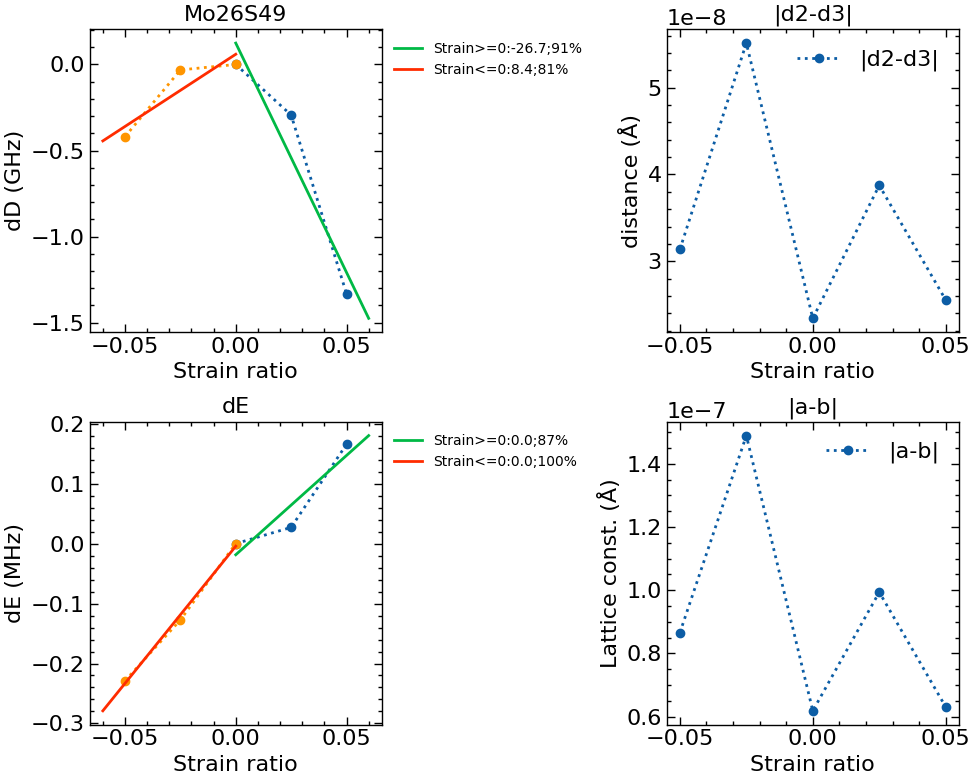

Mo26Se49


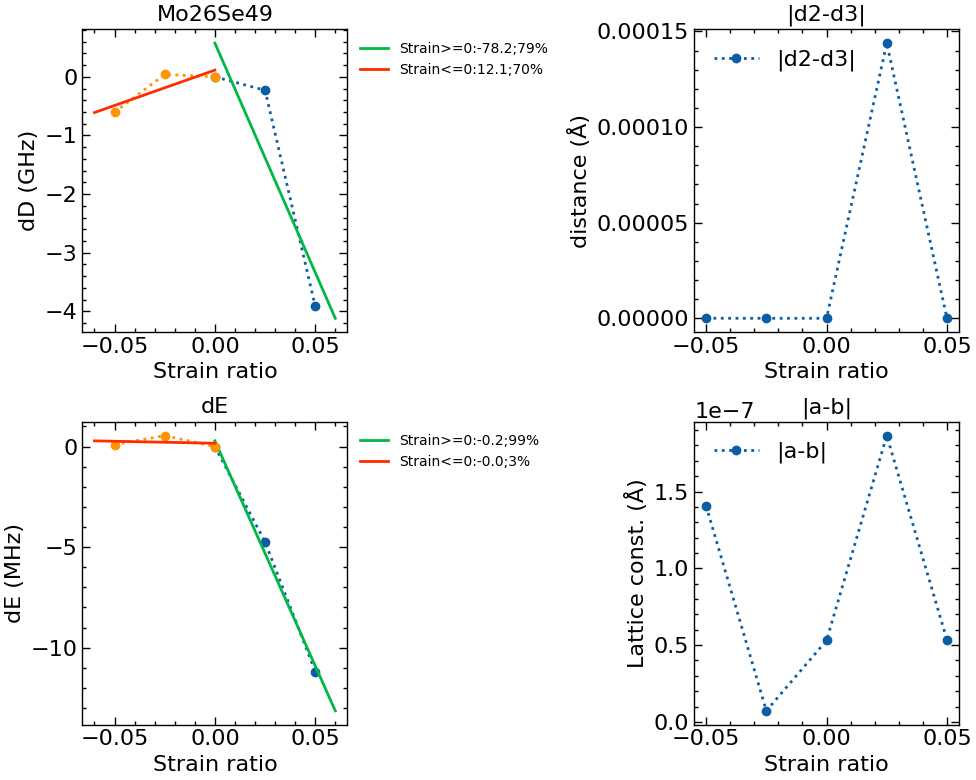

W26S49


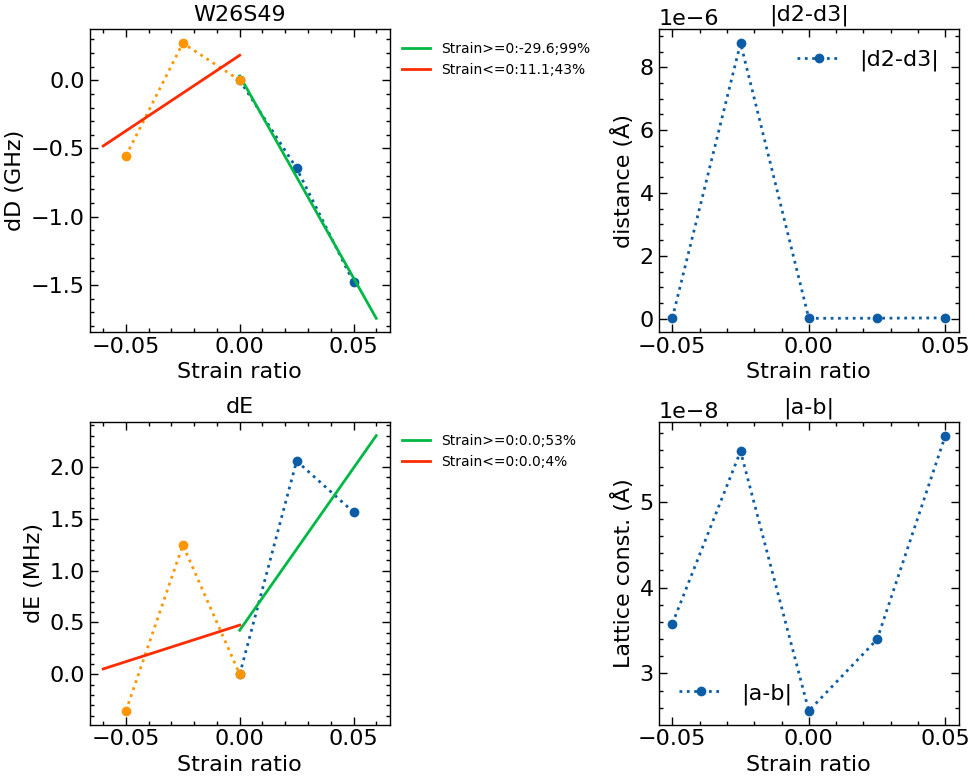

W26Se49


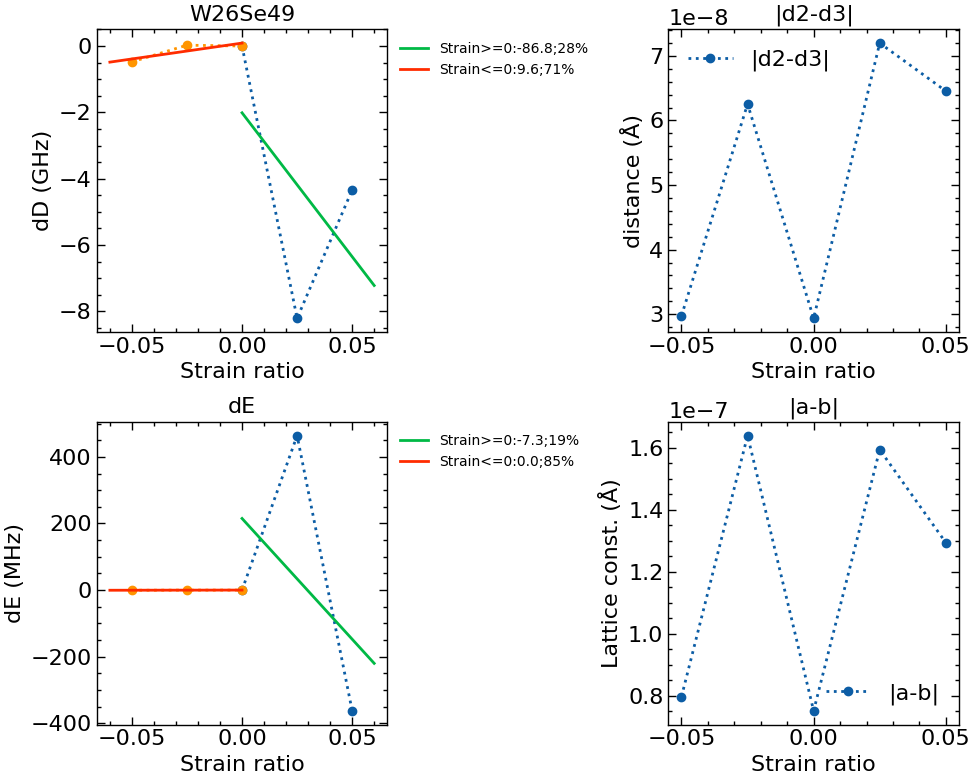

In [163]:
for plt_idx, formula in enumerate(df.sort_values(by="formula")["formula"].unique()):
    if "Te" in formula:
        continue
    fig = plot_D_structure(df, formula)
    plt.show()


## Structural information vs strain ratio

In [167]:
# plot d1, d2, and d3 for each strain component
def plot_d123(plot_df, formula):
    strain_comp = plot_df[plot_df["formula"] == formula].sort_values(by="strain_ratio")
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(2, 2, 1)
    ax.plot(strain_comp["strain_ratio"], strain_comp["d1"], label="d1", marker="o")
    ax.plot(strain_comp["strain_ratio"], strain_comp["d2"], label="d2", marker="o")
    ax.plot(strain_comp["strain_ratio"], strain_comp["d3"], label="d3", marker="o")
    ax.set_xlabel("strain ratio")
    ax.set_ylabel("distance (Å)")
    ax.set_title(strain_comp["formula"].iloc[0]+"_d1_d2_d3")
    ax.legend()

    ax = fig.add_subplot(2, 2, 2)
    d2_sub_d3 = strain_comp["d2"] - strain_comp["d3"]
    ax.plot(strain_comp["strain_ratio"], np.abs(d2_sub_d3), label="|d2-d3|", marker="o")
    ax.set_xlabel("strain ratio")
    ax.set_ylabel("distance (Å)")
    ax.set_title(strain_comp["formula"].iloc[0]+"_d2-d3")
    ax.legend()

    # plot a and b
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(strain_comp["strain_ratio"], strain_comp["a"], label="a", marker="o")
    ax.plot(strain_comp["strain_ratio"], strain_comp["b"], label="b", marker="o")
    ax.set_xlabel("strain ratio")
    ax.set_ylabel("Lattice constant (Å)")
    ax.set_title(strain_comp["formula"].iloc[0]+"_a_b")
    ax.legend()

    #plot a-b
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(strain_comp["strain_ratio"], np.abs(strain_comp["a"]-strain_comp["b"]), label="|a-b|", marker="o")
    ax.set_xlabel("strain ratio")
    ax.set_ylabel("Lattice constant (Å)")
    ax.set_title(strain_comp["formula"].iloc[0]+"_a-b")
    ax.legend()

    fig.tight_layout()
    return fig

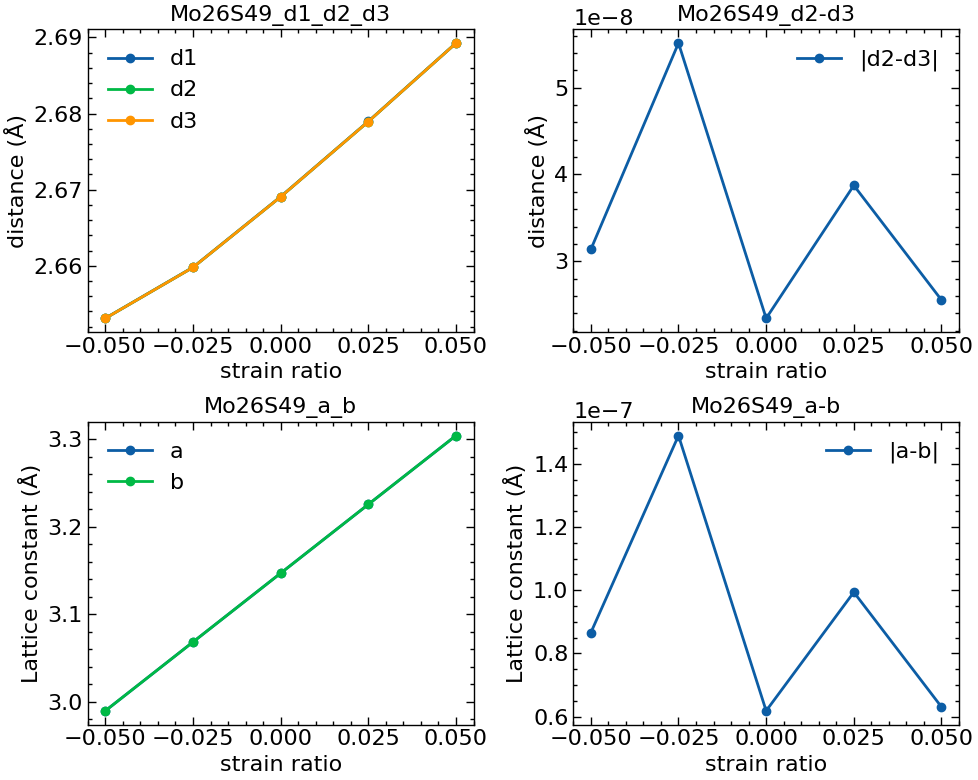

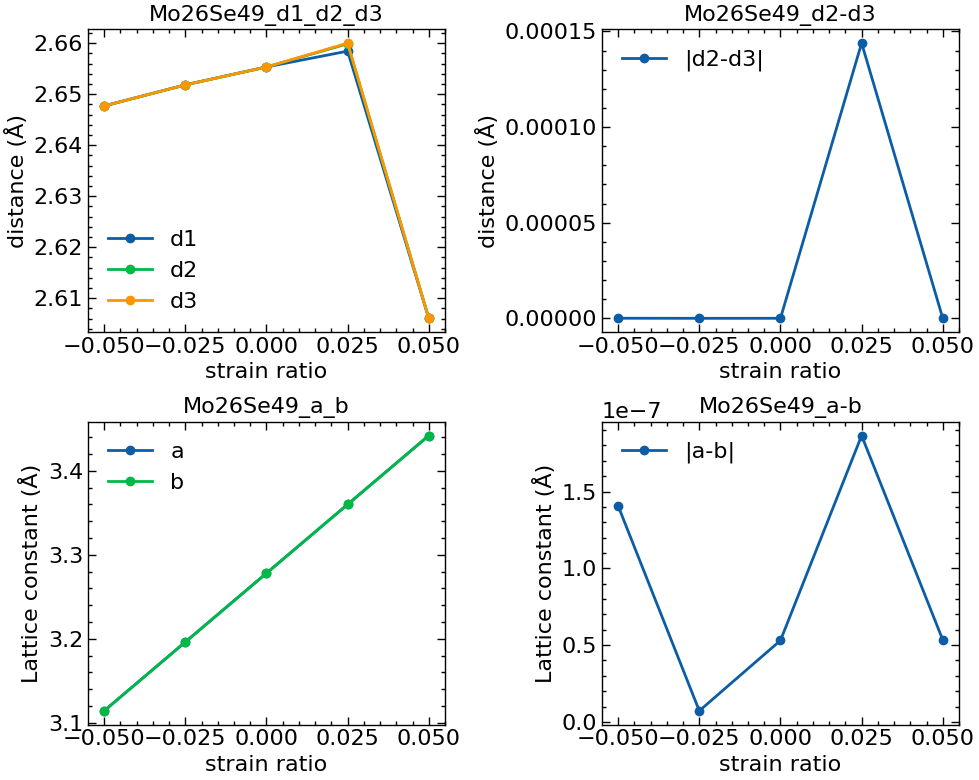

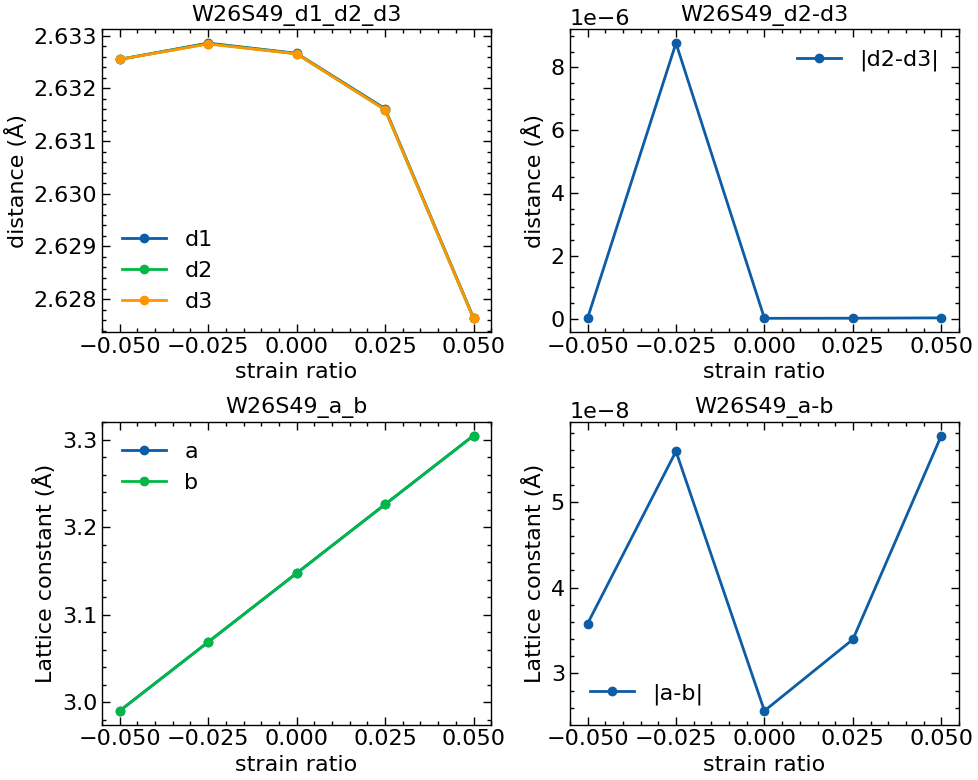

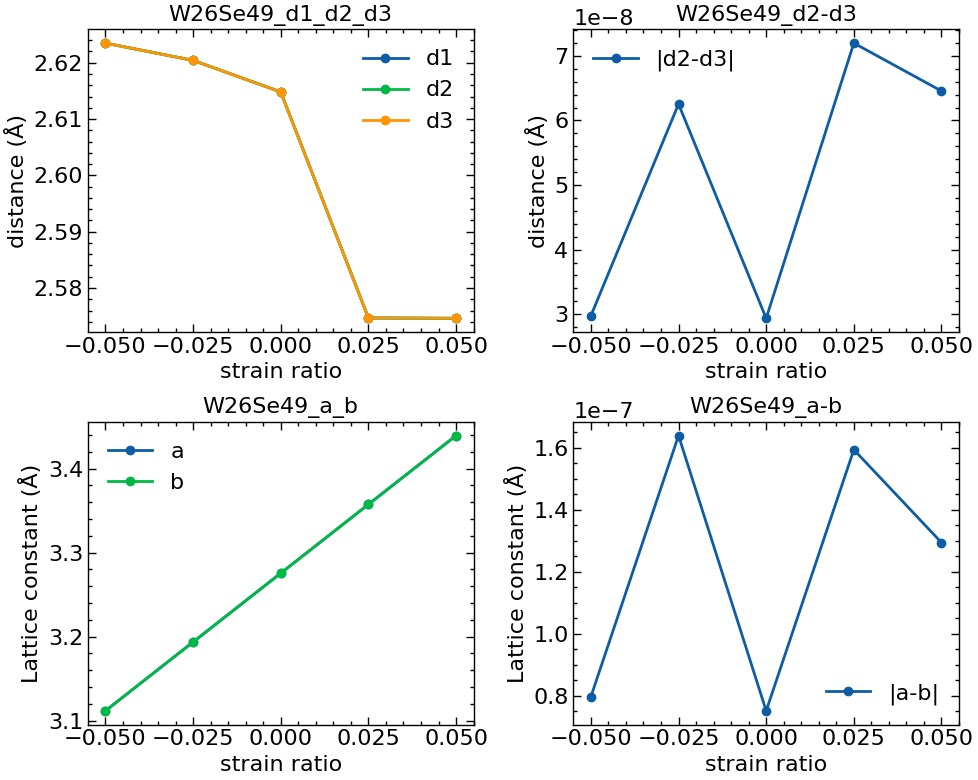

In [168]:
for formula in df.sort_values(by="formula")["formula"].unique():
    if "Te" in formula:
        continue
    plot_d123(df, formula)


# 4 Figures

## Structures

0 Mo26S49
1 Mo26Se49
2 W26S49
3 W26Se49


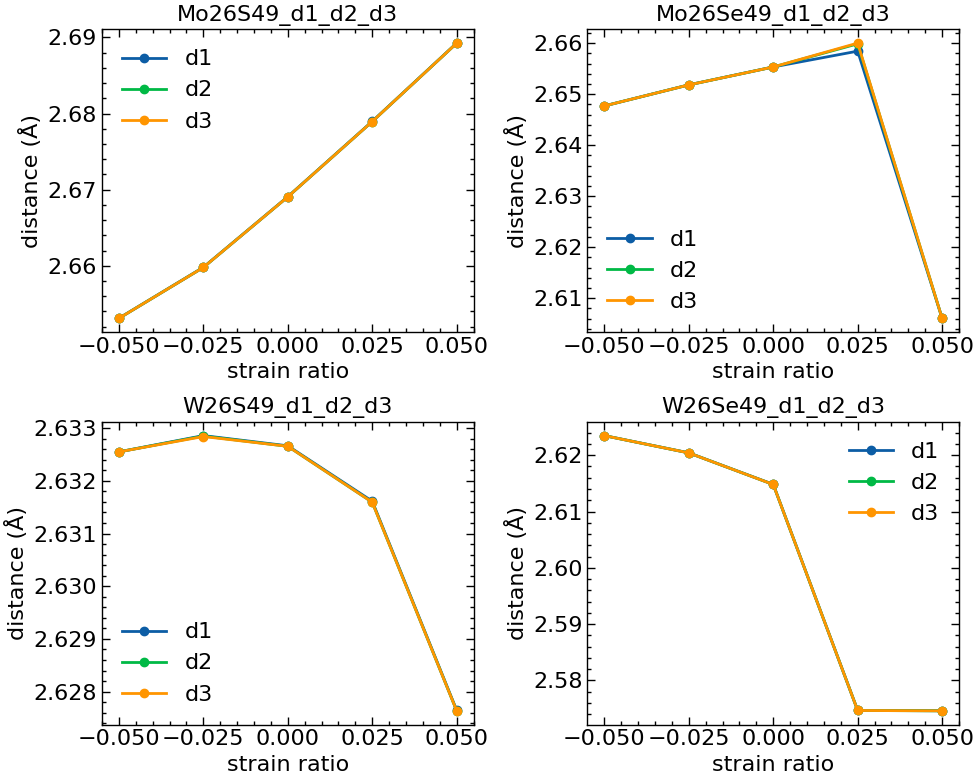

In [175]:
# plot d1, d2, and d3 for each strain component in a 2x2 grid plot
fig = plt.figure(figsize=(10, 8))
for plt_idx, formula in enumerate(df.loc[~df.formula.str.contains("Te")].sort_values(by="formula")["formula"].unique()):
    print(plt_idx, formula)
    strain_comp = df[df["formula"] == formula].sort_values(by="strain_ratio")
    ax = fig.add_subplot(2, 2, plt_idx+1)
    ax.plot(strain_comp["strain_ratio"], strain_comp["d1"], label="d1", marker="o")
    ax.plot(strain_comp["strain_ratio"], strain_comp["d2"], label="d2", marker="o")
    ax.plot(strain_comp["strain_ratio"], strain_comp["d3"], label="d3", marker="o")
    ax.set_xlabel("strain ratio")
    ax.set_ylabel("distance (Å)")
    ax.set_title(strain_comp["formula"].iloc[0]+"_d1_d2_d3")
    ax.legend()
fig.tight_layout()
plt.show()

0 Mo26S49
1 Mo26Se49
2 W26S49
3 W26Se49


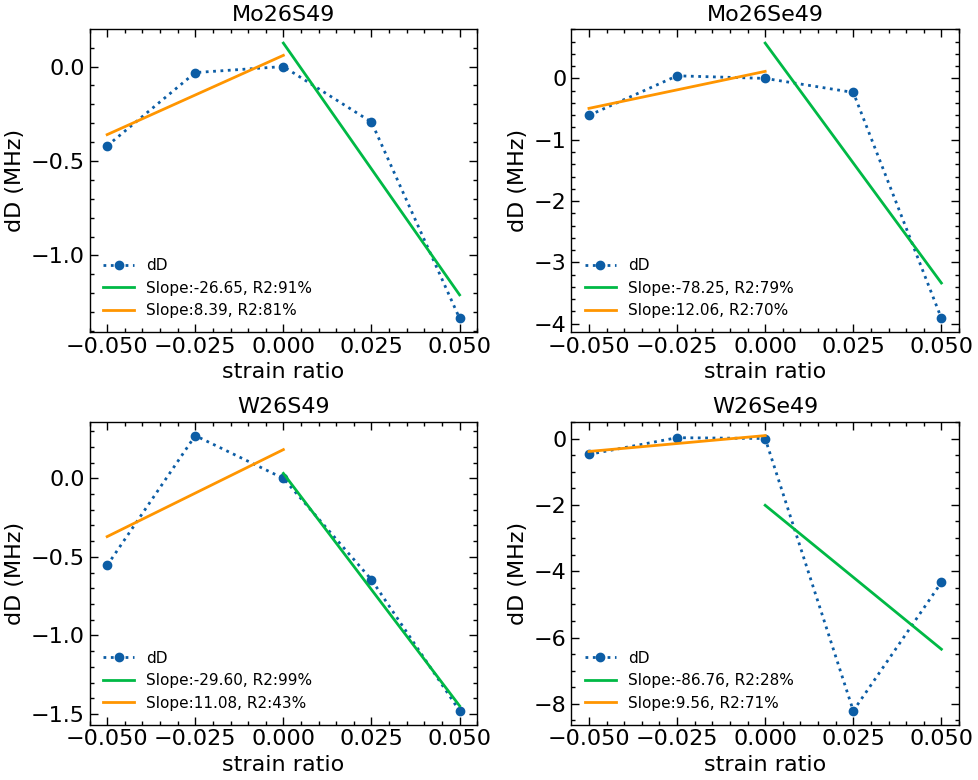

In [201]:
# plot dD for each strain component in a 2x2 grid plot
fig = plt.figure(figsize=(10, 8))
for plt_idx, formula in enumerate(df.loc[~df.formula.str.contains("Te")].sort_values(by="formula")["formula"].unique()):
    print(plt_idx, formula)
    strain_comp = df[df["formula"] == formula].sort_values(by="strain_ratio")
    ax = fig.add_subplot(2, 2, plt_idx+1)
    ax.plot(strain_comp["strain_ratio"], strain_comp["dD"], "o:", label="dD")

    # linear fits for strain ratio >= 0 and <= 0
    Ds = strain_comp["dD"].values
    strain_lg0 = strain_comp[strain_comp["strain_ratio"] >= 0]["strain_ratio"].values
    strain_sm0 = strain_comp[strain_comp["strain_ratio"] <= 0]["strain_ratio"].values

    D_fit = np.poly1d(np.polyfit(strain_lg0, Ds[strain_comp["strain_ratio"] >= 0], 1))
    r2 = r2_score(Ds[strain_comp["strain_ratio"] >= 0], D_fit(strain_lg0))
    ax.plot(strain_lg0, D_fit(strain_lg0), "-", label=f"Slope:{D_fit.c[0]:.2f}, R2:{r2:.0%}")
    D_fit = np.poly1d(np.polyfit(strain_sm0, Ds[strain_comp["strain_ratio"] <= 0], 1))
    r2 = r2_score(Ds[strain_comp["strain_ratio"] <= 0], D_fit(strain_sm0))
    ax.plot(strain_sm0, D_fit(strain_sm0), "-", label=f"Slope:{D_fit.c[0]:.2f}, R2:{r2:.0%}")


    ax.set_xlabel("strain ratio")
    ax.set_ylabel("dD (MHz)")
    ax.set_title(strain_comp["formula"].iloc[0])
    # set legend at left bottom corner
    ax.legend(loc="lower left", fontsize=11)

fig.tight_layout()
plt.show()

0 Mo26S49
1 Mo26Se49
2 W26S49
3 W26Se49


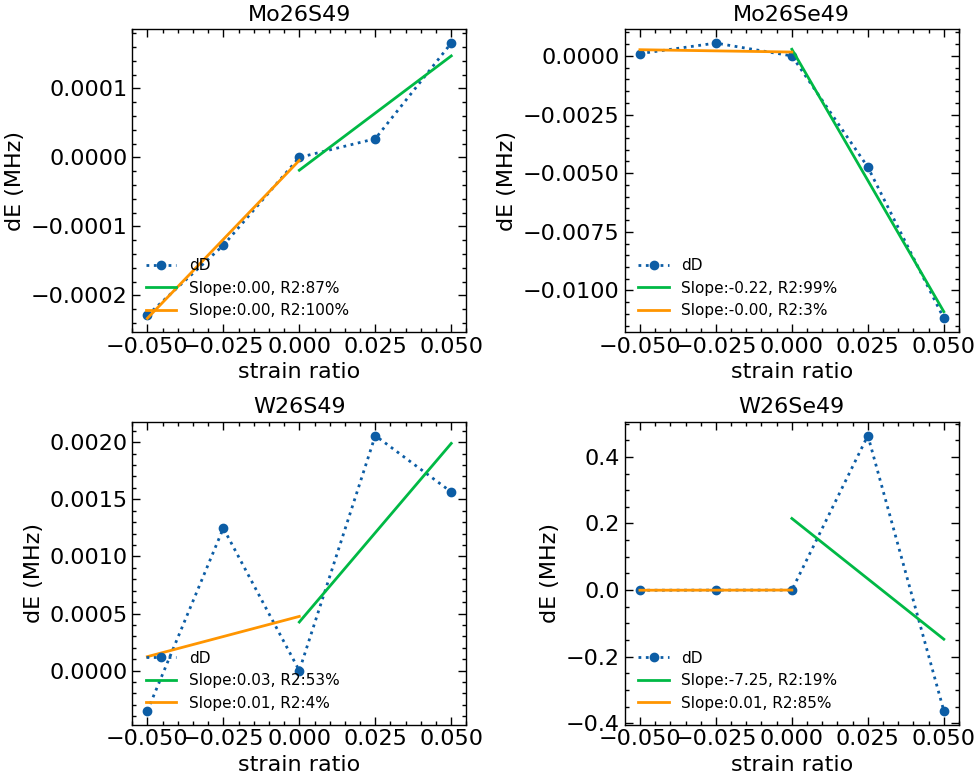

In [203]:
# plot dD for each strain component in a 2x2 grid plot
fig = plt.figure(figsize=(10, 8))
for plt_idx, formula in enumerate(df.loc[~df.formula.str.contains("Te")].sort_values(by="formula")["formula"].unique()):
    print(plt_idx, formula)
    strain_comp = df[df["formula"] == formula].sort_values(by="strain_ratio")
    ax = fig.add_subplot(2, 2, plt_idx+1)
    ax.plot(strain_comp["strain_ratio"], strain_comp["dE"], "o:", label="dD")

    # linear fits for strain ratio >= 0 and <= 0
    Ds = strain_comp["dE"].values
    strain_lg0 = strain_comp[strain_comp["strain_ratio"] >= 0]["strain_ratio"].values
    strain_sm0 = strain_comp[strain_comp["strain_ratio"] <= 0]["strain_ratio"].values

    D_fit = np.poly1d(np.polyfit(strain_lg0, Ds[strain_comp["strain_ratio"] >= 0], 1))
    r2 = r2_score(Ds[strain_comp["strain_ratio"] >= 0], D_fit(strain_lg0))
    ax.plot(strain_lg0, D_fit(strain_lg0), "-", label=f"Slope:{D_fit.c[0]:.2f}, R2:{r2:.0%}")
    D_fit = np.poly1d(np.polyfit(strain_sm0, Ds[strain_comp["strain_ratio"] <= 0], 1))
    r2 = r2_score(Ds[strain_comp["strain_ratio"] <= 0], D_fit(strain_sm0))
    ax.plot(strain_sm0, D_fit(strain_sm0), "-", label=f"Slope:{D_fit.c[0]:.2f}, R2:{r2:.0%}")


    ax.set_xlabel("strain ratio")
    ax.set_ylabel("dE (MHz)")
    ax.set_title(strain_comp["formula"].iloc[0])
    # set legend at left bottom corner
    ax.legend(loc="lower left", fontsize=11)

fig.tight_layout()
plt.show()